In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

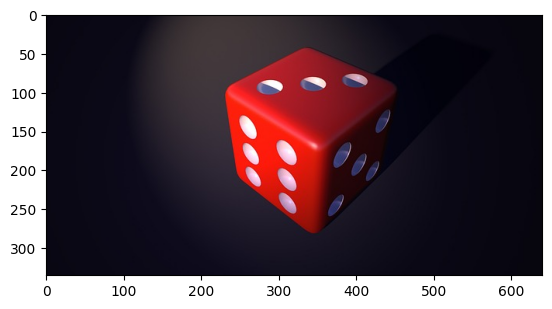

In [3]:
image = cv2.cvtColor(cv2.imread("cube-1963036_640.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [4]:
image.shape

(336, 640, 3)

In [5]:
red, green, blue = cv2.split(image)
red, green, blue = red/255, green/255, blue/255

Text(0.5, 1.0, 'Blue Channel')

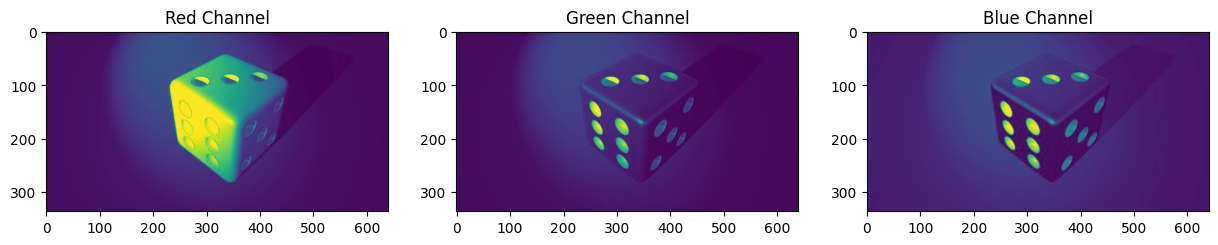

In [6]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(red)
ax[0].set_title("Red Channel")
ax[1].imshow(green)
ax[1].set_title("Green Channel")
ax[2].imshow(blue)
ax[2].set_title("Blue Channel")


Text(0.5, 1.0, 'Blue Channel')

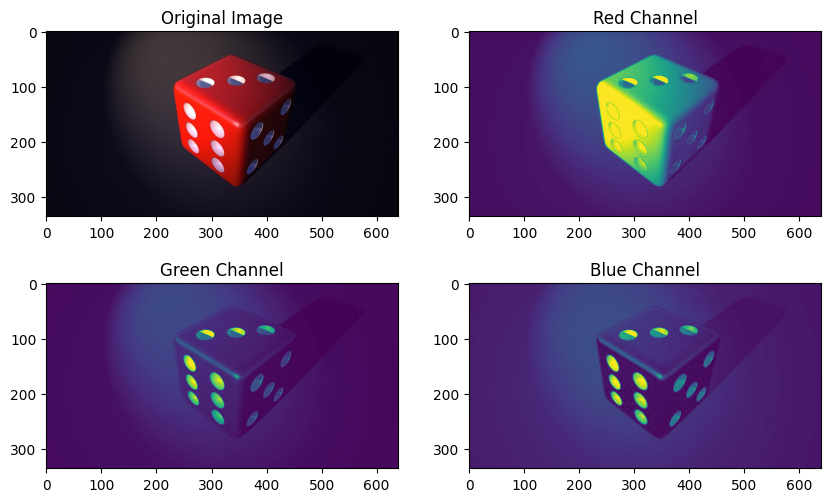

In [7]:
fig, ax = plt.subplots(2,2, figsize=(10,6))
ax[0,0].imshow(image)
ax[0,0].set_title("Original Image")
ax[0,1].imshow(red)
ax[0,1].set_title("Red Channel")
ax[1,0].imshow(green)
ax[1,0].set_title("Green Channel")
ax[1,1].imshow(blue)
ax[1,1].set_title("Blue Channel")

In [8]:
components = 20
pca_comp = PCA(n_components=components)

reduced_red = pca_comp.fit_transform(red)
reconstucted_red = pca_comp.inverse_transform(reduced_red)

reduced_green = pca_comp.fit_transform(green)
reconstucted_green = pca_comp.inverse_transform(reduced_green)

reduced_blue = pca_comp.fit_transform(blue)
reconstucted_blue = pca_comp.inverse_transform(reduced_blue)

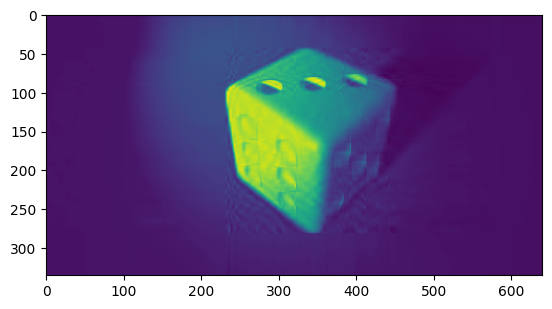

In [9]:
plt.imshow(reconstucted_red)

Text(0.5, 1.0, 'Blue Channel')

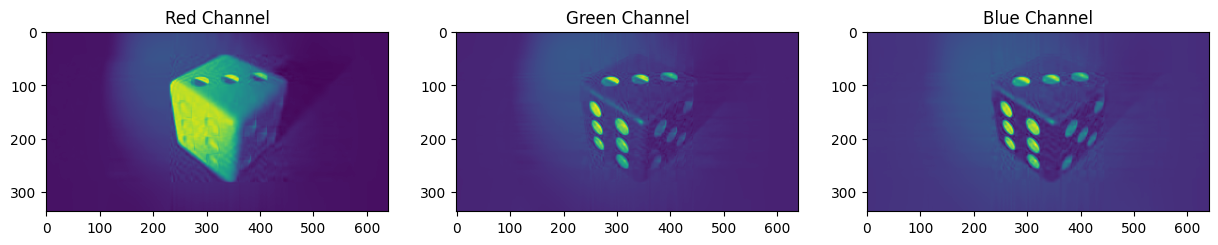

In [10]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(reconstucted_red)
ax[0].set_title("Red Channel")
ax[1].imshow(reconstucted_green)
ax[1].set_title("Green Channel")
ax[2].imshow(reconstucted_blue)
ax[2].set_title("Blue Channel")

In [11]:
reduced_image = cv2.merge((reconstucted_red,reconstucted_green,reconstucted_blue))



In [12]:
reduced_image.shape

(336, 640, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.09805848145915688..1.115984678941135].


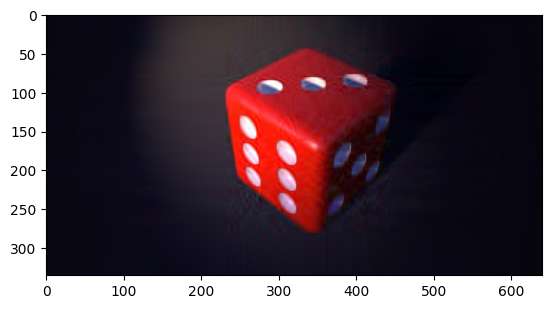

In [13]:
plt.imshow(reduced_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.09805848145915688..1.115984678941135].


Text(0.5, 1.0, 'Compressed Image (20 Pricipal Component)')

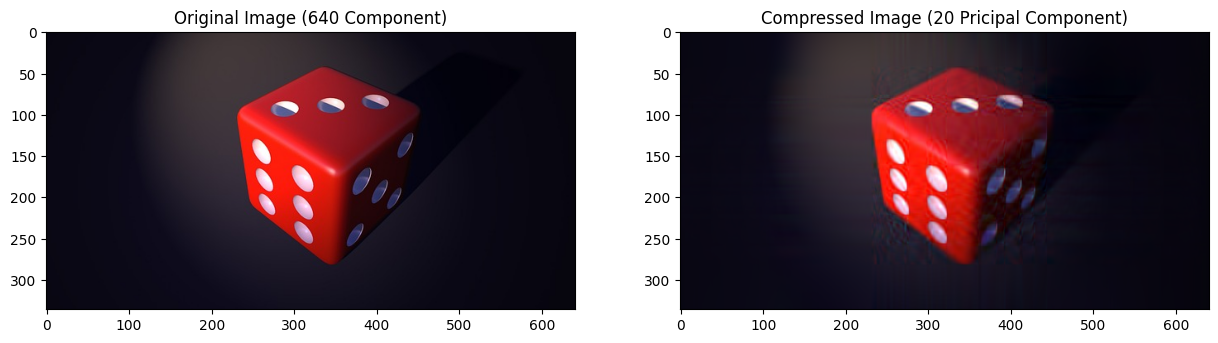

In [14]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(image)
ax[0].set_title("Original Image (640 Component)")
ax[1].imshow(reduced_image)
ax[1].set_title(f"Compressed Image ({components} Pricipal Component)")


In [15]:
cv2.imwrite("compresed_cube.jpg", reduced_image*255)

True

In [16]:
reduced_image

array([[[0.03395577, 0.02560599, 0.0723775 ],
        [0.03396483, 0.0256018 , 0.0723711 ],
        [0.03416943, 0.02582245, 0.07235561],
        ...,
        [0.02745098, 0.02352941, 0.05490196],
        [0.02745098, 0.02352941, 0.05490196],
        [0.02745098, 0.02352941, 0.05490196]],

       [[0.03394591, 0.02563513, 0.07238847],
        [0.03395335, 0.02563287, 0.07238343],
        [0.03415719, 0.0258526 , 0.07238288],
        ...,
        [0.02745098, 0.02352941, 0.05490196],
        [0.02745098, 0.02352941, 0.05490196],
        [0.02745098, 0.02352941, 0.05490196]],

       [[0.03392772, 0.02565064, 0.07234294],
        [0.03393456, 0.02564915, 0.07233675],
        [0.03413949, 0.02586915, 0.07232472],
        ...,
        [0.02745098, 0.02352941, 0.05490196],
        [0.02745098, 0.02352941, 0.05490196],
        [0.02745098, 0.02352941, 0.05490196]],

       ...,

       [[0.03493776, 0.02817114, 0.07408988],
        [0.03496316, 0.02828565, 0.0741727 ],
        [0.0350152 , 0

In [17]:
image

array([[[ 8,  6, 17],
        [ 8,  6, 17],
        [ 8,  6, 17],
        ...,
        [ 7,  6, 14],
        [ 7,  6, 14],
        [ 7,  6, 14]],

       [[ 8,  6, 17],
        [ 8,  6, 17],
        [ 8,  6, 17],
        ...,
        [ 7,  6, 14],
        [ 7,  6, 14],
        [ 7,  6, 14]],

       [[ 8,  6, 17],
        [ 8,  6, 17],
        [ 8,  6, 17],
        ...,
        [ 7,  6, 14],
        [ 7,  6, 14],
        [ 7,  6, 14]],

       ...,

       [[ 9,  7, 18],
        [ 9,  7, 18],
        [ 9,  7, 18],
        ...,
        [ 7,  6, 14],
        [ 7,  6, 14],
        [ 7,  6, 14]],

       [[ 9,  7, 18],
        [ 9,  7, 18],
        [ 9,  7, 18],
        ...,
        [ 7,  6, 14],
        [ 7,  6, 14],
        [ 7,  6, 14]],

       [[ 9,  7, 18],
        [ 9,  7, 18],
        [ 9,  7, 18],
        ...,
        [ 7,  6, 14],
        [ 7,  6, 14],
        [ 7,  6, 14]]], dtype=uint8)

In [18]:
def compress_image(file_name):
    image = cv2.cvtColor(cv2.imread(file_name), cv2.COLOR_BGR2RGB)
     
    red, green, blue = cv2.split(image)
    red, green, blue = red/255, green/255, blue/255

    pca_comp = PCA(n_components=50)

    reduced_red = pca_comp.fit_transform(red)
    reconstucted_red = pca_comp.inverse_transform(reduced_red)

    reduced_green = pca_comp.fit_transform(green)
    reconstucted_green = pca_comp.inverse_transform(reduced_green)

    reduced_blue = pca_comp.fit_transform(blue)
    reconstucted_blue = pca_comp.inverse_transform(reduced_blue)
    reduced_image = cv2.merge((reconstucted_red,reconstucted_green,reconstucted_blue))
    cv2.imwrite("compresed_cube2.jpg", reduced_image*255)
    return "Image Compressed successfully"

In [19]:
compress_image("compresed_cube.jpg")

'Image Compressed successfully'

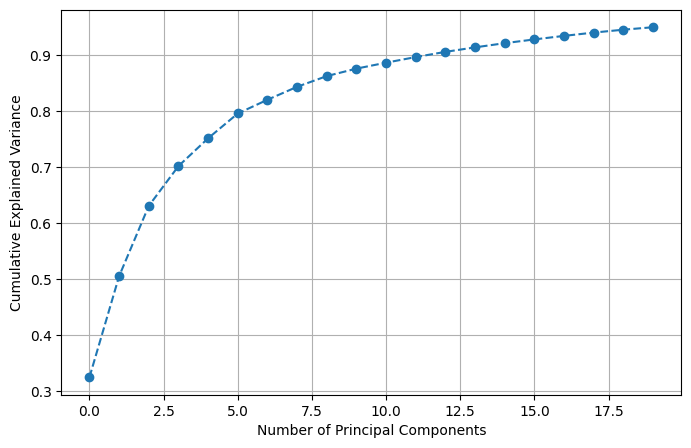

In [23]:

# Calculate the explained variance ratio
explained_variance_ratio = pca_comp.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()
